# ولگرد دو بعدی

In [1]:
import numpy as np
import matplotlib.pyplot as pl

In [2]:
def polar2drandom_walk( N , r=1 , trials = 10000 ):
    random_angles = np.random.uniform( 0, 2*np.pi , ( trials , N ) )
    
    x_values = np.sum( r*np.cos( random_angles ) , 1 )
    y_values = np.sum( r*np.sin( random_angles ) , 1 )
    
    r2_values = x_values*x_values + y_values*y_values 
    
    r2_avg = np.average( r2_values )
    return r2_avg

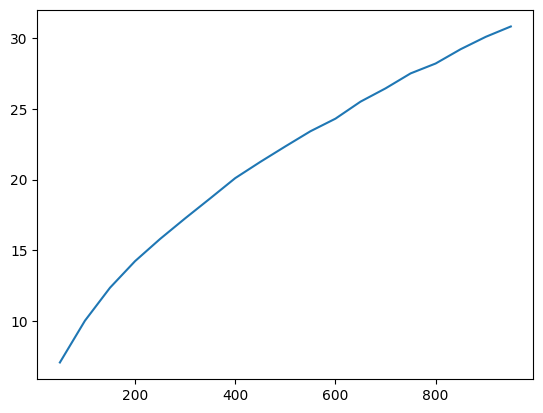

In [3]:
NVals , r_avgs = [] , []
for N in range( 50 , 1000 , 50 ):
    NVals.append( N )
    r_avgs.append( np.sqrt( polar2drandom_walk( N  ) ) )

pl.plot( NVals , r_avgs )

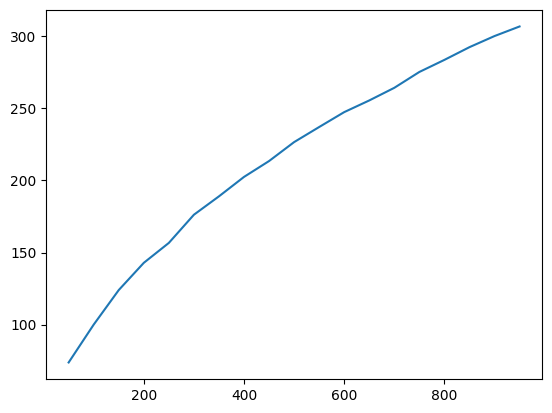

In [4]:
NVals , r_avgs = [] , []
for N in range( 50 , 1000 , 50 ):
    NVals.append( N )
    r_avgs.append( np.sqrt( polar2drandom_walk( N   , r = np.random.normal( 10 , 1 , N) ) ) )

pl.plot( NVals , r_avgs )

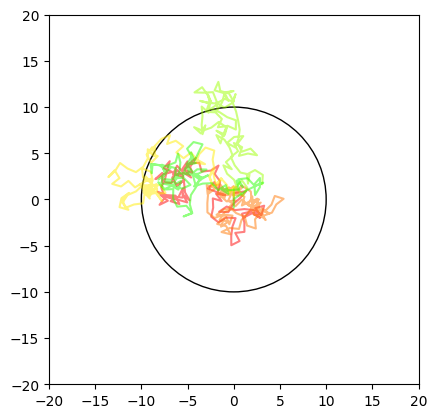

In [6]:
N = 100
r = 1

def produce1randomWalker( N , r ):
    random_angles = np.random.uniform( 0, 2*np.pi , N )
    
    x_values = r*np.cos( random_angles ) 
    y_values = r*np.sin( random_angles )

    steps_x = np.cumsum( x_values )
    steps_y = np.cumsum( y_values )

    steps_x[0] = 0
    steps_x[1] = 0
    return ( steps_x , steps_y )

figure, axes = pl.subplots()

avg_r = (np.average(r)+np.std( r ))*np.sqrt( N )
pl.xlim(-2*avg_r , 2*avg_r )
pl.ylim(-2*avg_r , 2*avg_r )

for i in range( 5 ):
    x , y = produce1randomWalker( N , r)
    pl.plot( x , y , color=pl.colormaps['hsv'](i*20%255) , alpha=0.5 )
    pass
    

axes.set_aspect( 1 )
axes.add_artist( pl.Circle( (0,0) , avg_r , color='black' , fill=False) )

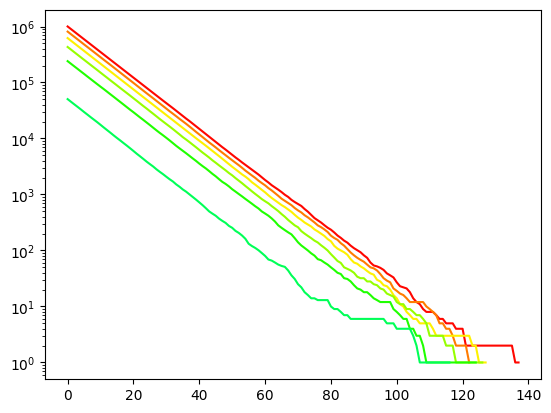

In [80]:
def decay(N0 , lambda0=0.1 ):
    steps , ns = [] , []
    i = 0
    while N0 > 0:
        steps.append(i)
        ns.append(N0)
        N0 -= np.sum( np.random.uniform(0,1, N0) < lambda0 )
        i += 1

    return steps , ns 

pl.yscale( 'log' )
iii = 1
for N0 in range( 1001000 , 0 , -190100 ):
    steps , ns = decay( N0 )
    pl.plot( steps , ns , color=pl.colormaps['hsv'](iii) )
    iii+=20